# Directory
동일 경로에 ipnyb파일과 디렉토리명:dataset에 데이터셋 그대로 압축을 풀어줬습니다.\
./dataset\
--> /train\
--> /test\
--> /sample_submission.csv\
./project.ipynb


# env, version

ubuntu - 18.04.6 LTS

python - 3.9.12\
pandas - 1.4.2\
numpy - 1.22.4\
sklearn - 1.1.1\
opencv(cv2) - 4.5.5

In [1]:
'''
!pip install opencv-python
!pip install glob
!pip install sklearn
!pip install pandas
!pip install numpy
'''

'\n!pip install opencv-python\n!pip install glob\n!pip install sklearn\n!pip install pandas\n!pip install numpy\n'

# Import

In [2]:
# 필요한 함수 선언
import pandas as pd
import numpy as np
import os
from glob import glob
import cv2
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# Data Loader

In [3]:
# 전체 train 데이터 들고오기
def get_train_data(data_dir):
    img_path_list = []
    label_list = []
    for case_name in sorted(os.listdir(data_dir)):
        current_path = os.path.join(data_dir, case_name)
        e_img_path_list=[]
        if os.path.isdir(current_path):
            # get image path
            e_img_path_list.extend(glob(os.path.join(current_path, 'image', '*.jpg')))
            e_img_path_list.extend(glob(os.path.join(current_path, 'image', '*.png')))
            e_img_path_list.sort()
            e_img_path_list.pop(0)
            # get label
            label_df = pd.read_csv(current_path+'/label.csv')
            label_list.extend(label_df['leaf_weight'].drop(len(label_df)-1)) # case당 마지막이미지의 weight에 해당하는 이미지는 존재하지않으므로 마지막weight 제거

            img_path_list.extend(e_img_path_list) # 각 1번이미지의 weight값은 존재하지않으므로, 1번이미지경로는 제거
    return img_path_list, label_list

# case23과 case59을 버림
def get_train_data_drop_error1(data_dir):
    img_path_list = []
    label_list = []
    for case_name in sorted(os.listdir(data_dir)):
        current_path = os.path.join(data_dir, case_name)
        e_img_path_list=[]
        if os.path.isdir(current_path):
            if "CASE23" in current_path:
                continue
            # get image path
            e_img_path_list.extend(glob(os.path.join(current_path, 'image', '*.jpg')))
            e_img_path_list.extend(glob(os.path.join(current_path, 'image', '*.png')))
            e_img_path_list.sort()
            e_img_path_list.pop(0)
            # get label
            label_df = pd.read_csv(current_path+'/label.csv')
            label_list.extend(label_df['leaf_weight'].drop(len(label_df)-1)) # case당 마지막이미지의 weight에 해당하는 이미지는 존재하지않으므로 마지막weight 제거

            img_path_list.extend(e_img_path_list) # 각 1번이미지의 weight값은 존재하지않으므로, 1번이미지경로는 제거
    return img_path_list, label_list

# case23과 case59을 버림
def get_train_data_drop_error2(data_dir):
    img_path_list = []
    label_list = []
    for case_name in sorted(os.listdir(data_dir)):
        current_path = os.path.join(data_dir, case_name)
        e_img_path_list=[]
        if os.path.isdir(current_path):
            if "CASE23" in current_path or "CASE59" in current_path:
                continue
            # get image path
            e_img_path_list.extend(glob(os.path.join(current_path, 'image', '*.jpg')))
            e_img_path_list.extend(glob(os.path.join(current_path, 'image', '*.png')))
            e_img_path_list.sort()
            e_img_path_list.pop(0)
            # get label
            label_df = pd.read_csv(current_path+'/label.csv')
            label_list.extend(label_df['leaf_weight'].drop(len(label_df)-1)) # case당 마지막이미지의 weight에 해당하는 이미지는 존재하지않으므로 마지막weight 제거

            img_path_list.extend(e_img_path_list) # 각 1번이미지의 weight값은 존재하지않으므로, 1번이미지경로는 제거
    return img_path_list, label_list


#테스트이미지와 meta를 가져오는 함수
def get_test_data(data_dir):
    # get image path
    img_path_list = glob(os.path.join(data_dir, 'image', '*.jpg'))
    img_path_list.extend(glob(os.path.join(data_dir, 'image', '*.png')))
    img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))
    return img_path_list

In [4]:
train_img_path1,train_label1=get_train_data('./dataset/train')
train_img_path2,train_label2=get_train_data_drop_error1('./dataset/train')
train_img_path3,train_label3=get_train_data_drop_error2('./dataset/train')


In [5]:
for i in range(10):
    print('%s : %s'%(train_img_path1[i],train_label1[i]))
print('%d : %d'%(len(train_img_path1),len(train_label1)))

./dataset/train/CASE01/image/CASE01_02.png : 49.193
./dataset/train/CASE01/image/CASE01_03.png : 59.764
./dataset/train/CASE01/image/CASE01_04.png : 72.209
./dataset/train/CASE01/image/CASE01_05.png : 85.737
./dataset/train/CASE01/image/CASE01_06.png : 102.537
./dataset/train/CASE01/image/CASE01_07.png : 123.359
./dataset/train/CASE01/image/CASE01_08.png : 156.149
./dataset/train/CASE01/image/CASE01_09.png : 174.931
./dataset/train/CASE02/image/CASE02_02.png : 194.662
./dataset/train/CASE02/image/CASE02_03.png : 198.366
1517 : 1517


In [6]:
for i in range(10):
    print('%s : %s'%(train_img_path2[i],train_label2[i]))
print('%d : %d'%(len(train_img_path2),len(train_label2)))

./dataset/train/CASE01/image/CASE01_02.png : 49.193
./dataset/train/CASE01/image/CASE01_03.png : 59.764
./dataset/train/CASE01/image/CASE01_04.png : 72.209
./dataset/train/CASE01/image/CASE01_05.png : 85.737
./dataset/train/CASE01/image/CASE01_06.png : 102.537
./dataset/train/CASE01/image/CASE01_07.png : 123.359
./dataset/train/CASE01/image/CASE01_08.png : 156.149
./dataset/train/CASE01/image/CASE01_09.png : 174.931
./dataset/train/CASE02/image/CASE02_02.png : 194.662
./dataset/train/CASE02/image/CASE02_03.png : 198.366
1509 : 1509


In [7]:
for i in range(10):
    print('%s : %s'%(train_img_path3[i],train_label3[i]))
print('%d : %d'%(len(train_img_path3),len(train_label3)))

./dataset/train/CASE01/image/CASE01_02.png : 49.193
./dataset/train/CASE01/image/CASE01_03.png : 59.764
./dataset/train/CASE01/image/CASE01_04.png : 72.209
./dataset/train/CASE01/image/CASE01_05.png : 85.737
./dataset/train/CASE01/image/CASE01_06.png : 102.537
./dataset/train/CASE01/image/CASE01_07.png : 123.359
./dataset/train/CASE01/image/CASE01_08.png : 156.149
./dataset/train/CASE01/image/CASE01_09.png : 174.931
./dataset/train/CASE02/image/CASE02_02.png : 194.662
./dataset/train/CASE02/image/CASE02_03.png : 198.366
1477 : 1477


# Image Sizing
BGR이미지를 HSV로 변환해 색상(Hue)의 축, 범위를 조절해 전체데이터기준, 현재크기를 가장 잘 예측하는 파라미터를 구함\
이를 이용해 이미지를 픽셀수로 변환\

In [8]:
# 이미지 사이징 모델
# BGR 이미지를 HSV로 변환 후, 마스킹을 한 뒤, 잎의 픽셀수를 리턴함(0~765)
def image_sizing(path,size=1024,ar=23,green=56,type=1):
    src=cv2.imread(path)
    src=cv2.resize(src,dsize=(size,size))
    img_hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
    lower_green=(green-ar,30,30)
    upper_green=(green+ar,255,255)
    img_mask=cv2.inRange(img_hsv,lower_green,upper_green)
    img_result=cv2.bitwise_and(src,src,mask=img_mask)

    img_result_to_bgr = cv2.cvtColor(img_result, cv2.COLOR_HSV2BGR)
    gray = cv2.cvtColor(img_result_to_bgr, cv2.COLOR_BGR2GRAY)
    gray=cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
    mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
    # 가우시안 블러 적용해봄
    #mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)
    if type==1:
        return np.sum(mask)/size/size
    elif type==2:
        fig=plt.figure(figsize=(12,8))
        ax1=fig.add_subplot(1,2,1)
        ax1.imshow(src)
        ax1=fig.add_subplot(1,2,2)
        ax1.imshow(mask)
    else:
        return plt.imshow(mask)

In [9]:
# 최적의 이미지 파라미터값을 가져오는 함수.
# 실행시, 1024x1024 사이즈 기준, 약 20시간정도 걸림
# 1024,23,56 이 가장좋은 mae값이 도출되었음
def getbestmodel(imsize=1024,imcolormin=30,imcolormax=60,greensmin=50,greensmax=60): 
    bestimcolor=0
    bestgreens=0
    bestmse=100000000
    bestmae=100000000
    bestnmae=100000000
    for imcolor in range(imcolormin,imcolormax+1):
        for greens in range(greensmin,greensmax+1):
            real_img_path,real_img_size=get_train_data('dataset/train')

    # 실제 이미지를 통해 예측 사이즈를 얻어옴
            pred_img_size=[]
            count=0
            for path in real_img_path:
                pred_img_size.append(test2_sizing(path,imsize,imcolor,greens))

            X=np.array(pred_img_size).reshape(-1,1)
            y=np.array(real_img_size).reshape(-1,1)
            poly_features=PolynomialFeatures(degree=2,include_bias=False)
            X_poly=poly_features.fit_transform(X)
            lin_reg=LinearRegression()
            lin_reg.fit(X_poly,y)
            lin_reg.intercept_,lin_reg.coef_
            X_new=np.linspace(0,600,1500).reshape(-1,1)
            X_new_poly=poly_features.transform(X_new)
            y_new=lin_reg.predict(X_new_poly)

            y_lin_pred=lin_reg.predict(X_poly)
            val_mse=mean_squared_error(y,y_lin_pred)
            val_mae=mean_absolute_error(y,y_lin_pred)
            val_nmae = mean_absolute_error(y, y_lin_pred)/np.mean(np.abs(y))    
            if val_nmae<bestnmae:
                bestimcolor=imcolor
                bestigreens=greens
                bestmse=val_mse
                bestmae=val_mae
                bestnmae=val_nmae
                print('최적값 갱신 ! :imcolor :%d, greens : %d, nmae : %.4f'%(imcolor,greens,val_nmae))
#getbestmodel()

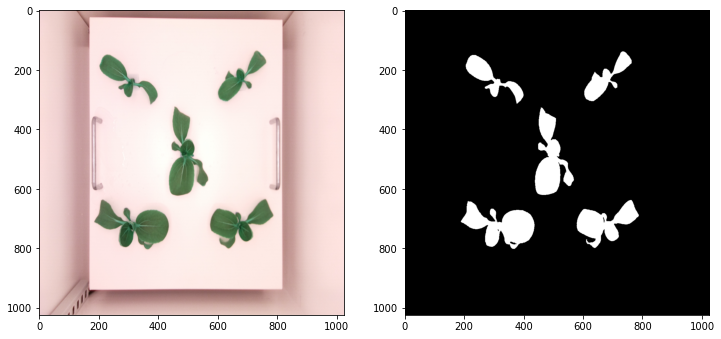

In [22]:
#마스킹된 이미지는 아래와 같음
image_sizing('./dataset/train/CASE10/image/CASE10_20.png',type=2)

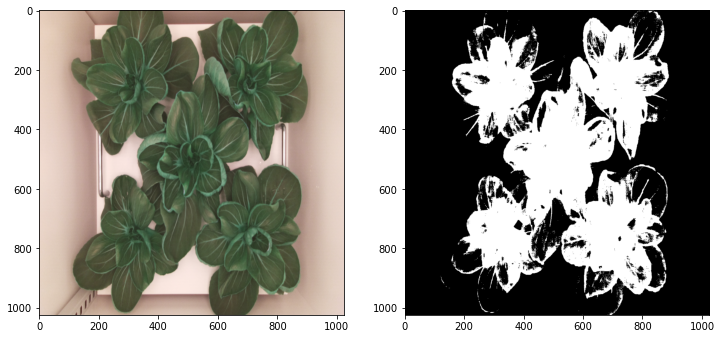

In [11]:
#case23에서는 제대로 마스킹처리가 되지 않음
image_sizing('./dataset/train/CASE23/image/CASE23_05.jpg',type=2)

In [12]:
start=time()
train_pred_size1=[]
train_pred_size2=[]
train_pred_size3=[]
for path in train_img_path1:
    train_pred_size1.append(image_sizing(path,1024,23,56))
for path in train_img_path2:
    train_pred_size2.append(image_sizing(path,1024,23,56))
for path in train_img_path3:
    train_pred_size3.append(image_sizing(path,1024,23,56))
print(time()-start)

561.5644905567169


# Modeling
X는 이미지에서 추출한 잎의 픽셀수, y는 라벨(해당 이미지의 현재사이즈)로 다항회귀 진행\
case59는 58와 동일한 이미지이므로, 전체적인 mae값에 영향을 줄 수 있음\
case23은 마스킹이 제대로 되지않고, 성장정도가 너무 커 가려진잎때문에 제대로 측정이 안될 수 있음\
이 두케이스를 고려해 모델 비교

mae :2.2245 , nmae : 0.0298


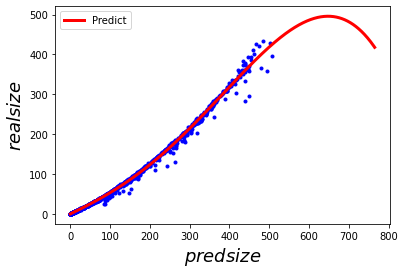

In [13]:
X=np.array(train_pred_size1).reshape(-1,1)
y=np.array(train_label1).reshape(-1,1)
poly_features=PolynomialFeatures(degree=4,include_bias=False)
X_poly=poly_features.fit_transform(X)
lin_reg1=LinearRegression()
lin_reg1.fit(X_poly,y)
#lin_reg1.intercept_,lin_reg1.coef_
X_new=np.linspace(0,765,765).reshape(-1,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg1.predict(X_new_poly)

y_lin_pred=lin_reg1.predict(X_poly)
mae=np.mean(np.abs(y-y_lin_pred))
nmae=mae/np.mean(np.abs(y))
print('mae :%.4f , nmae : %.4f'%(mae,nmae))
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,'r-',linewidth=3,label="Predict")
plt.xlabel('$predsize$',fontsize=18)
plt.ylabel('$realsize$',fontsize=18)
plt.legend()
plt.show()

mae :2.1263 , nmae : 0.0286


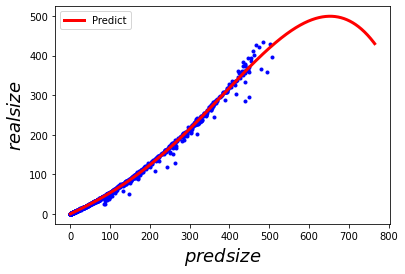

In [14]:
X=np.array(train_pred_size2).reshape(-1,1)
y=np.array(train_label2).reshape(-1,1)
poly_features=PolynomialFeatures(degree=4,include_bias=False)
X_poly=poly_features.fit_transform(X)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)
X_new=np.linspace(0,765,1500).reshape(-1,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg2.predict(X_new_poly)

y_lin_pred=lin_reg2.predict(X_poly)
mae=np.mean(np.abs(y-y_lin_pred))
nmae=mae/np.mean(np.abs(y))
print('mae :%.4f , nmae : %.4f'%(mae,nmae))
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,'r-',linewidth=3,label="Predict")
plt.xlabel('$predsize$',fontsize=18)
plt.ylabel('$realsize$',fontsize=18)
plt.legend()
plt.show()

mae :2.1271 , nmae : 0.0289


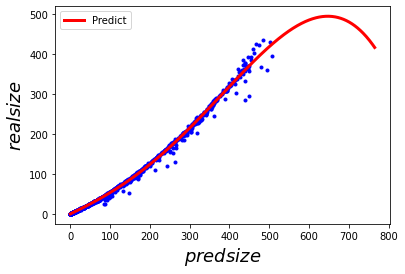

In [15]:
X=np.array(train_pred_size3).reshape(-1,1)
y=np.array(train_label3).reshape(-1,1)
poly_features=PolynomialFeatures(degree=4,include_bias=False)
X_poly=poly_features.fit_transform(X)
lin_reg3=LinearRegression()
lin_reg3.fit(X_poly,y)
X_new=np.linspace(0,765,765).reshape(-1,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg3.predict(X_new_poly)

y_lin_pred=lin_reg3.predict(X_poly)
mae=np.mean(np.abs(y-y_lin_pred))
nmae=mae/np.mean(np.abs(y))
print('mae :%.4f , nmae : %.4f'%(mae,nmae))
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,'r-',linewidth=3,label="Predict")
plt.xlabel('$predsize$',fontsize=18)
plt.ylabel('$realsize$',fontsize=18)
plt.legend()
plt.show()

# 학습진행
case를 버리지않은 데이터, case23만 버린 데이터, case23,59를 버린 데이터를 가지고 만든 다항회귀모델에서\
case23을 버린 모델이 mae값이 가장 낮게 도출됨\
이 모델을 이용해 추론

In [16]:
start=time()
test_img_path = get_test_data('./dataset/test')
# 테스트이미지 픽셀사이즈화
test_pred_size=[]
for path in test_img_path:
    test_pred_size.append(image_sizing(path,1024,23,56))
print(time()-start)

58.30618333816528


In [17]:
for i in range(10):
    print('%s'%(test_img_path[i]))

./dataset/test/image/001.png
./dataset/test/image/002.png
./dataset/test/image/003.png
./dataset/test/image/004.png
./dataset/test/image/005.png
./dataset/test/image/006.png
./dataset/test/image/007.png
./dataset/test/image/008.png
./dataset/test/image/009.png
./dataset/test/image/010.png


In [18]:
# case23만 버린 모델의 mae가 가장 낮으므로 이 모델을 사용
y_pred_test=lin_reg2.predict(poly_features.transform(np.array(test_pred_size).reshape(-1,1)))

In [19]:
y_pred_test[0:10]

array([[6.51673758e+01],
       [3.15971508e+02],
       [1.53414853e+00],
       [6.09456145e+01],
       [7.11552289e+01],
       [6.71920925e+01],
       [1.35877588e+00],
       [7.31369988e+01],
       [2.97133119e-01],
       [7.56836033e+01]])

In [20]:
# size는 음수가 나올 수 없으므로 0보다 작은값은 0으로 치환
y_pred_test=np.where(y_pred_test<0,0,y_pred_test)

In [21]:
submission = pd.read_csv('./dataset/sample_submission.csv')
submission['leaf_weight'] =y_pred_test
submission.to_csv('./submission.csv', index=False)